<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [5]:
!pip install pandas

### Step 1: Import Required Libraries


In [6]:
import pandas as pd

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [7]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [8]:
## Write your code here
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [9]:
# print number total number of rows
print("Number of rows:", df.shape[0])

Number of rows: 65437


##### Task 2: Remove the duplicate rows from the dataframe.



In [10]:
## Write your code here
#Task 2. Remove duplicate rows
df_cleaned = df.drop_duplicates()

In [11]:
#to check the Number of duplicate rows after removal
num_duplicates_after = df_cleaned.duplicated().sum()

print("Number of duplicate rows after removal:", num_duplicates_after)

Number of duplicate rows after removal: 0


### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [12]:
## Write your code here
#Task 3. Missing values for all columns (count and %)
na_count = df.isna().sum().sort_values(ascending=False)
na_pct   = (df.isna().mean() * 100).round(2)
missing_summary = pd.concat([na_count, na_pct], axis=1)
missing_summary.columns = ["missing_count", "missing_%"]
print(missing_summary)

                            missing_count  missing_%
AINextMuch less integrated          64289      98.25
AINextLess integrated               63082      96.40
AINextNo change                     52939      80.90
AINextMuch more integrated          51999      79.46
EmbeddedAdmired                     48704      74.43
...                                   ...        ...
MainBranch                              0       0.00
Check                                   0       0.00
Employment                              0       0.00
Age                                     0       0.00
ResponseId                              0       0.00

[114 rows x 2 columns]


##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [13]:
## Write your code here
# Task 4: Missing values in 'RemoteWork'
missing_remote = df['RemoteWork'].isna().sum()
print("Number of missing rows in 'RemoteWork':", missing_remote)


Number of missing rows in 'RemoteWork': 10631


In [14]:
# percentage of missing values
missing_remote_pct = df['RemoteWork'].isna().mean() * 100
print(f"Percentage of missing rows in 'RemoteWork': {missing_remote_pct:.2f}%")

Percentage of missing rows in 'RemoteWork': 16.25%


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [15]:
## Write your code here
# Task 5: Value counts for 'RemoteWork'
remote_counts = df['RemoteWork'].value_counts(dropna=False)  # include NaN in counts
print(remote_counts)


RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
NaN                                     10631
Name: count, dtype: int64


In [16]:
# in percentage value
remote_counts_pct = df['RemoteWork'].value_counts(normalize=True, dropna=False) * 100
print(remote_counts_pct)

RemoteWork
Hybrid (some remote, some in-person)    35.171233
Remote                                  31.833672
In-person                               16.748934
NaN                                     16.246160
Name: proportion, dtype: float64


##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [17]:
## Write your code here
# Task 6: Most frequent (majority) value in 'RemoteWork'
most_frequent_remote = df['RemoteWork'].mode(dropna=True)[0]
print("Most frequent value in 'RemoteWork':", most_frequent_remote)

Most frequent value in 'RemoteWork': Hybrid (some remote, some in-person)


In [18]:
# Alternatively
most_frequent_remote = df['RemoteWork'].value_counts().idxmax()
print("Most frequent value in 'RemoteWork':", most_frequent_remote)

Most frequent value in 'RemoteWork': Hybrid (some remote, some in-person)


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [19]:
## Write your code here
# Task 7: Impute missing values in 'RemoteWork' with the majority value

# Step 1: Get the majority value again (for safety)
majority_value = df['RemoteWork'].mode(dropna=True)[0]

# Step 2: Replace NaN with majority value
df['RemoteWork'] = df['RemoteWork'].fillna(majority_value)

# Step 3: Verify no missing values remain
print("Missing values in 'RemoteWork' after imputation:", df['RemoteWork'].isna().sum())


Missing values in 'RemoteWork' after imputation: 0


##### Task 8: Check for any compensation-related columns and describe their distribution.



Compensation-related columns: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']

=== Summary Statistics for ConvertedCompYearly ===
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


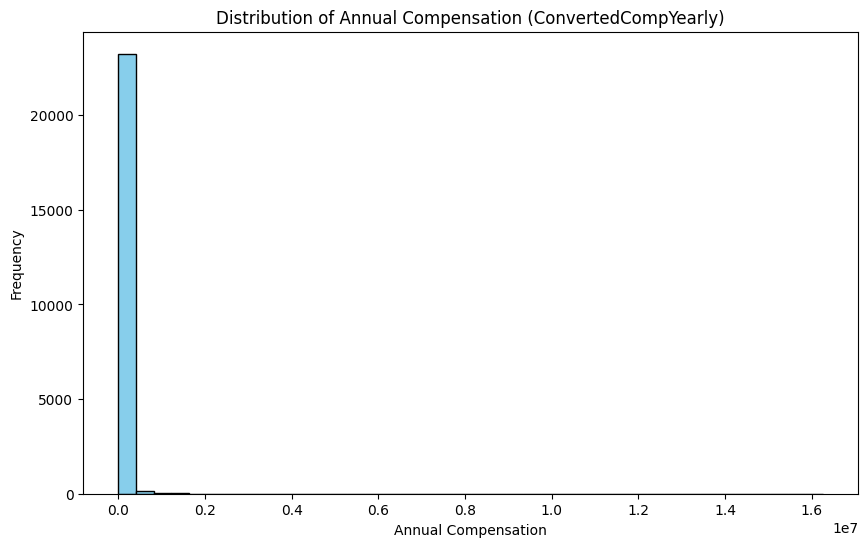

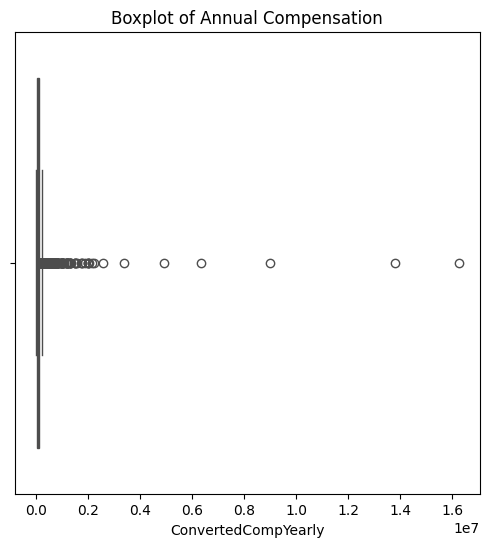


=== Summary Statistics for log10(Compensation) ===
count    23435.000000
mean         4.683803
std          0.612141
min          0.000000
25%          4.514707
50%          4.812913
75%          5.033309
max          7.211030
Name: ConvertedCompYearly, dtype: float64


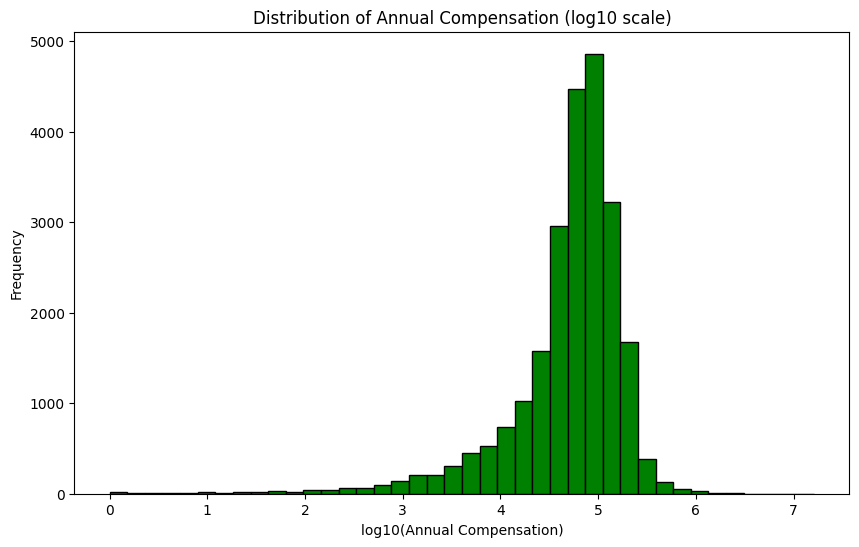

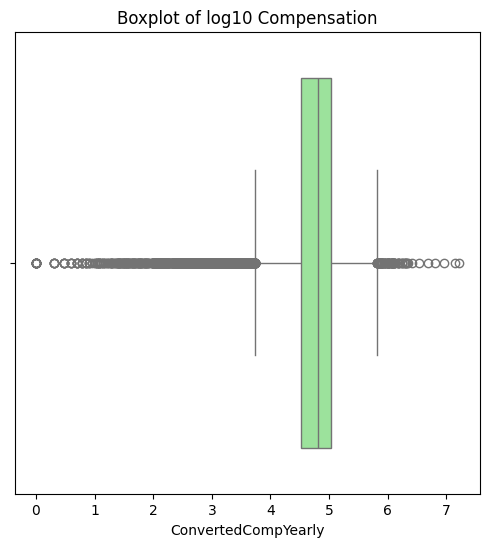

In [23]:
## Write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Task 8: Check for compensation-related columns and describe their distribution

# Step 1: Look for any column names that mention "Comp"
comp_columns = [col for col in df.columns if "Comp" in col]
print("Compensation-related columns:", comp_columns)

# Step 2: Describe and visualize ConvertedCompYearly
if "ConvertedCompYearly" in df.columns:
    comp_data = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce").dropna()
    
    print("\n=== Summary Statistics for ConvertedCompYearly ===")
    print(comp_data.describe())
    
    # Histogram (raw data)
    plt.figure(figsize=(10,6))
    comp_data.plot(kind="hist", bins=40, color="skyblue", edgecolor="black")
    plt.title("Distribution of Annual Compensation (ConvertedCompYearly)")
    plt.xlabel("Annual Compensation")
    plt.ylabel("Frequency")
    plt.show()
    
    # Boxplot (raw data)
    plt.figure(figsize=(6,6))
    sns.boxplot(x=comp_data, color="orange")
    plt.title("Boxplot of Annual Compensation")
    plt.show()
    
    # === Log Transformation ===
    comp_log = comp_data[comp_data > 0].apply(lambda x: np.log10(x))  # avoid log(0)
    
    print("\n=== Summary Statistics for log10(Compensation) ===")
    print(comp_log.describe())
    
    # Histogram (log-transformed data)
    plt.figure(figsize=(10,6))
    comp_log.plot(kind="hist", bins=40, color="green", edgecolor="black")
    plt.title("Distribution of Annual Compensation (log10 scale)")
    plt.xlabel("log10(Annual Compensation)")
    plt.ylabel("Frequency")
    plt.show()
    
    # Boxplot (log-transformed data)
    plt.figure(figsize=(6,6))
    sns.boxplot(x=comp_log, color="lightgreen")
    plt.title("Boxplot of log10 Compensation")
    plt.show()
else:
    print("No compensation-related column found in dataset.")



What we did in Task 8

Identified compensation-related column → we found ConvertedCompYearly.
Described distribution →
Many rows were missing values.
Among available data, the average salary is very high, but the distribution is skewed.
Most participants earn in a normal range, but a few earn extremely high salaries (outliers).

Visualized distribution →
Histogram shows most salaries are clustered at the lower end, with a long tail to the right.
Boxplot highlights extreme outliers.

Applied log transformation →
By plotting log10(Compensation), the distribution became much more balanced (closer to normal).
This makes it easier to analyze typical patterns without being distorted by extreme values.

✅ Simple Discussion
The compensation data (ConvertedCompYearly) is highly skewed because a few participants reported very high salaries.
Most people earn in a moderate range, but the raw distribution makes it look like salaries are very spread out.
After applying a log transformation, the data looks more normal and is easier to interpret.
This shows that when working with salary/compensation data, handling outliers and skewness is important for meaningful analysis.

### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
